In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [88]:
df = pd.read_csv("oppgave1/data/lego.population.csv", sep = ",", encoding = "latin1")
df

,Item_Number,Set_Name,Theme,Pieces,Price,Amazon_Price,Year,Ages,Pages,Minifigures,Packaging,Weight,Unique_Pieces,Availability,Size
0,41916,Extra Dots - Series 2,DOTS,109.0,$3.99,$3.44,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,$3.99,$3.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
2,11006,Creative Blue Bricks,Classic,52.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,28.0,Retail,Small
3,11007,Creative Green Bricks,Classic,60.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,36.0,Retail,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,$4.99,$4.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Retail,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,45678,SPIKE Prime Set,LEGO® Education,528.0,$329.95,NaN,2020,Ages_10+,NaN,2.0,NaN,NaN,108.0,NaN,Small
1300,71367,Mario's House & Yoshi,LEGO® Super Mario,205.0,$29.99,NaN,2020,Ages_6+,NaN,2.0,Box,NaN,114.0,Retail,Small
1301,71368,Toad's Treasure Hunt,LEGO® Super Mario,464.0,$69.99,NaN,2020,Ages_8+,NaN,4.0,Box,NaN,195.0,Retail,Small
1302,71369,Bowser's Castle Boss Battle,LEGO® Super Mario,1010.0,$99.99,NaN,2020,Ages_8+,NaN,NaN,Box,NaN,346.0,Retail,Small


## Rensing og omgjøring av datasettet

In [89]:
# Fjerner forklaringsvariabler vi ikke trenger
df2 = df[["Set_Name", "Theme", "Price", "Pieces", "Pages", "Minifigures", "Unique_Pieces"]]

# Fjerner observasjoner med manglende datapunkter
df2 = df2.dropna()

# Gjør themes om til string og fjern alle tegn vi ikke vil ha med
df2['Theme'] = df2['Theme'].astype(str)
df2['Theme'] = df2['Theme'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

# Fjerner dollartegn og trademark-tegn fra datasettet
df2['Price'].astype(str)
df2['Price'] = df2['Price'].str.replace(r'\$', '', regex = True)

# Gjør så prisen om til float
df2['Price'] = df2['Price'].astype(float)

# Display av det renskede settet:
df2


,Set_Name,Theme,Price,Pieces,Pages,Minifigures,Unique_Pieces
13,Stephanie's Summer Heart Box,Friends,7.99,95.0,40.0,1.0,52.0
16,Woody & RC,Disney,9.99,69.0,28.0,1.0,36.0
17,Mia's Summer Heart Box,Friends,7.99,85.0,36.0,1.0,41.0
18,Olivia's Summer Heart Box,Friends,7.99,93.0,40.0,2.0,48.0
19,Police Patrol Car,City,9.99,92.0,36.0,1.0,52.0
...,...,...,...,...,...,...,...
1171,1989 Batmobile,Batman,249.99,3306.0,404.0,3.0,484.0
1172,Tree House,Ideas,199.99,3036.0,428.0,4.0,482.0
1173,Welcome to Apocalypseburg!,THE LEGO MOVIE 2,299.99,3178.0,452.0,13.0,692.0
1174,Jurassic Park: T. rex Rampage,Jurassic World,249.99,3120.0,464.0,6.0,525.0


## Variabler for varemerke og ikke varemerke

In [90]:
mythemes_brands = ['Disney', 'Unikitty', 'NINJAGO', 'Marvel', 'THE LEGO MOVIE 2', 'Harry Potter', 'LEGO Frozen 2', 'Minions', 
                   'Jurassic World', 'DC', 'Monkie Kid']
mythemes_notBrands = ['Friends', 'City', 'DUPLO', 'Speed Champions', 'Hidden Side', 'Classic', 'Juniors', 'Creator 3-in-1', 
                      'Ideas', 'Creator Expert', 'Powered UP', 'LEGO Education']
mythemes_unclearBrands = ['Star Wars', 'Minecraft', 'Batman', 'Trolls World Tour', 'Powerpuff Girls', 'Overwatch', 'Spider-Man', 
                          'Stranger Things', 'Minifigures']
mythemes_all = ['Disney', 'Unikitty', 'NINJAGO', 'Marvel', 'THE LEGO MOVIE 2', 'Harry Potter', 'LEGO Frozen 2', 'Minions', 
                   'Jurassic World', 'DC', 'Monkie Kid', 'Friends', 'City', 'DUPLO', 'Speed Champions', 'Hidden Side',
                   'Classic', 'Juniors', 'Creator 3-in-1', 'Ideas', 'Creator Expert', 'Powered UP', 'LEGO Education',
                   'Star Wars', 'Minecraft', 'Batman', 'Trolls World Tour', 'Powerpuff Girls', 'Overwatch', 'Spider-Man', 
                          'Stranger Things', 'Minifigures']

## Tar hensyn til varemerke i en egen kategori (brukt i mlr)

In [91]:
unclear_conditions = df2['Theme'].isin(mythemes_unclearBrands)
non_brand_conditions = df2['Theme'].isin(mythemes_notBrands)
brand_conditions = df2['Theme'].isin(mythemes_brands)

# Oppretter en ny kolonne i datasettet som skal videre brukes for å svare på problemstillingen
df2['Category'] = np.select([unclear_conditions, non_brand_conditions, brand_conditions], ['Unclear', 'Non_Brand', 'Brand'])



In [92]:
# Enkel Lineær formel

pieces_formel = 'Price ~ Pieces'

# Multippelt lineære formler

mlr_normal_formel = 'Price ~ Pieces + C(Category, Treatment("Non_Brand"))'
mlr_expanded_formel = 'Price ~ Pieces * C(Category, Treatment("Non_Brand"))'

## Enkel LR

In [93]:
def enkelLineærRegresjon(formel):
    modell = smf.ols(formel, data = df2)
    resultat = modell.fit()
    return resultat

In [94]:
enkelLineærRegresjon(pieces_formel).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     3802.
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          9.01e-288
Time:                        05:42:48   Log-Likelihood:                -3194.2
No. Observations:                 714   AIC:                             6392.
Df Residuals:                     712   BIC:                             6401.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2338      0.988     10.363      0.000       8.295      12.173
Pieces         0.0873      0.001     61.664      0.000       0.085       0.090
==============================================================================
Omnibus:                      659.458   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61214.067
Skew:                           3.717   Prob(JB):                         0.00
Kurtosis:                      47.748   Cond. No.                         866.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Kryssplott (Uten regresjonslinje)

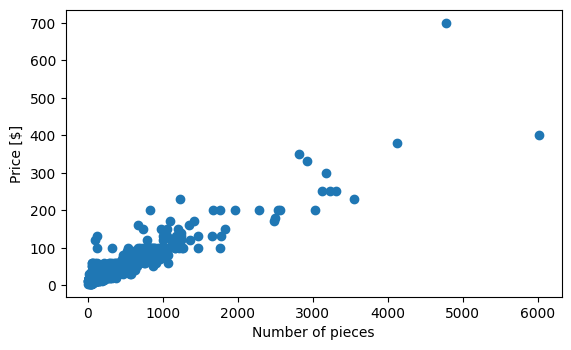

In [95]:
# Antall brikker mot pris
plt.scatter(df2['Pieces'], df2['Price'])
plt.xlabel('Number of pieces')
plt.ylabel('Price [$]')
plt.gca().set_aspect(5)
plt.show()

## Kryssplott med regresjonslinje

In [96]:
def LRLine(formel, slope_value):
    resultat = enkelLineærRegresjon(formel)

    slope = resultat.params[slope_value]
    intercept = resultat.params['Intercept']

    regression_x = np.array(df2[slope_value])
    regression_y = slope * regression_x + intercept

    plt.scatter(df2[slope_value], df2['Price'], label='Data Points')
    plt.plot(regression_x, regression_y, color='red', label='Regression Line')
    plt.xlabel('Number of ' + slope_value)
    plt.ylabel('Price [$]')
    plt.title('Kryssplott med regresjonslinje (enkel LR)')
    plt.legend()
    plt.grid()
    plt.show()

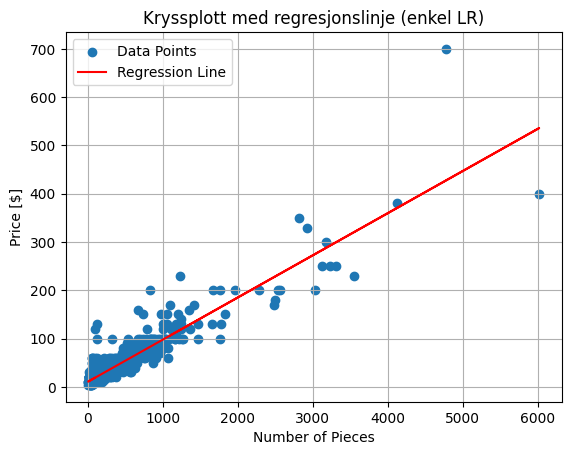

In [97]:
LRLine(pieces_formel, 'Pieces')

In [98]:
df2.groupby(['Theme']).size().reset_index(name = 'Count')

,Theme,Count
0,Batman,16
1,City,94
2,Classic,4
3,Creator 3-in-1,21
4,Creator Expert,10
5,DC,8
6,DUPLO,32
7,Disney,35
8,Friends,94
9,Harry Potter,22


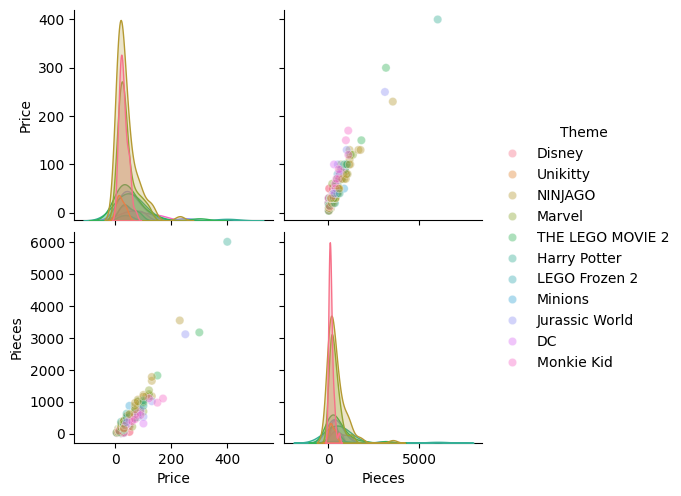

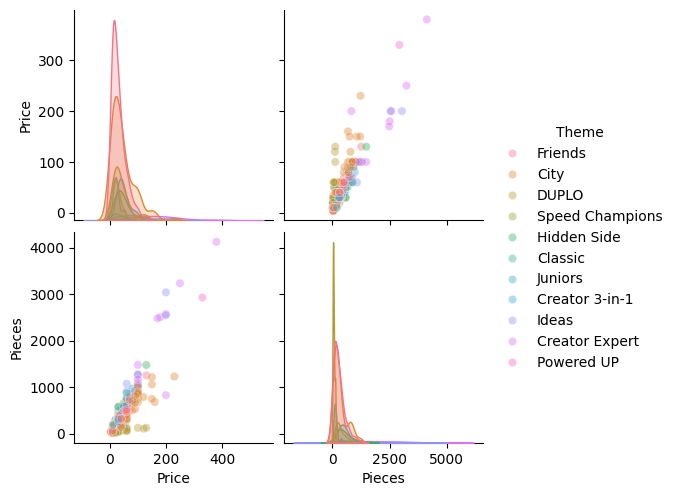

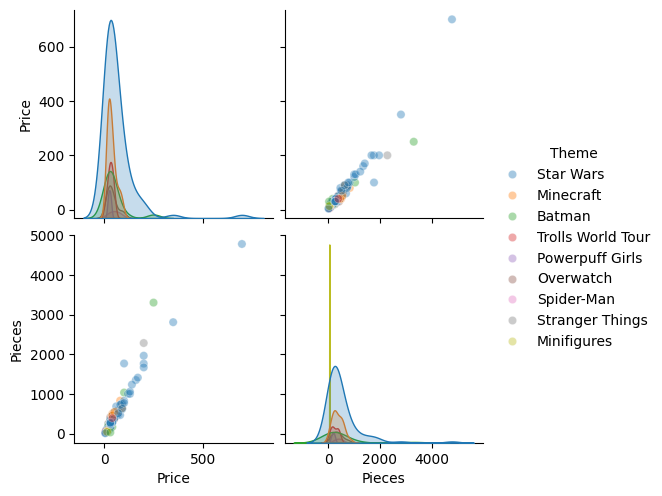

In [99]:
def showMultipleScatterPlotts(arr):
    subset_df = df2[df2['Theme'].isin(arr)]
    sns.pairplot(subset_df, vars = ['Price', 'Pieces'],
             hue = 'Theme', 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
    plt.show()


showMultipleScatterPlotts(mythemes_brands)
showMultipleScatterPlotts(mythemes_notBrands)
showMultipleScatterPlotts(mythemes_unclearBrands)

## Enkel LR med flere regresjonslinjer (ikke multippel LR)

In [100]:
def showMultipleRegressionLine(arr):
    resultater = []
    for theme in arr:
        theme_subset = df2[df2['Theme'] == theme]
        if theme_subset.empty:
            print(f"No data for theme: {theme}")
            continue
        model = smf.ols('Price ~ Pieces', data=theme_subset).fit()
        resultater.append((theme, model))

    for theme, res in resultater:
        slope = res.params['Pieces']
        intercept = res.params['Intercept']

        theme_subset = df2[df2['Theme'] == theme]
        regression_x = np.array(theme_subset['Pieces'])
        regression_y = slope * regression_x + intercept

        plt.scatter(theme_subset['Pieces'], theme_subset['Price'], label=theme)
        plt.plot(regression_x, regression_y)

    plt.xlabel('Number of Pieces')
    plt.ylabel('Price')
    plt.title('Scatterplot with regressionlines')
    plt.legend()
    plt.grid(True)
    plt.show()


No data for theme: LEGO Education


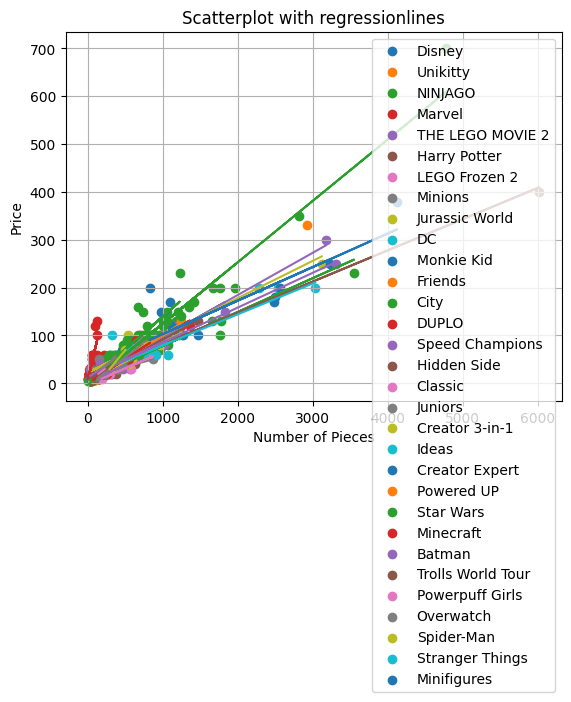

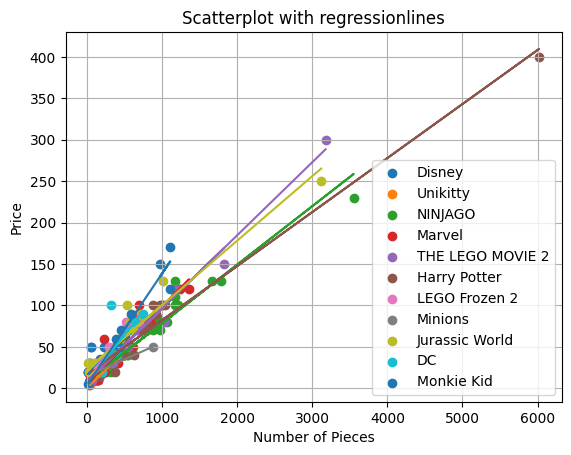

No data for theme: LEGO Education


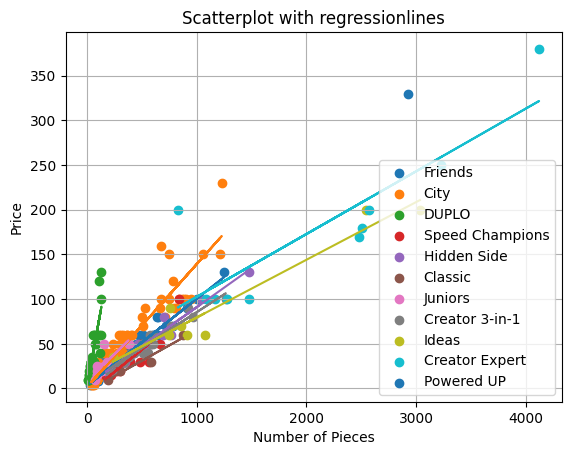

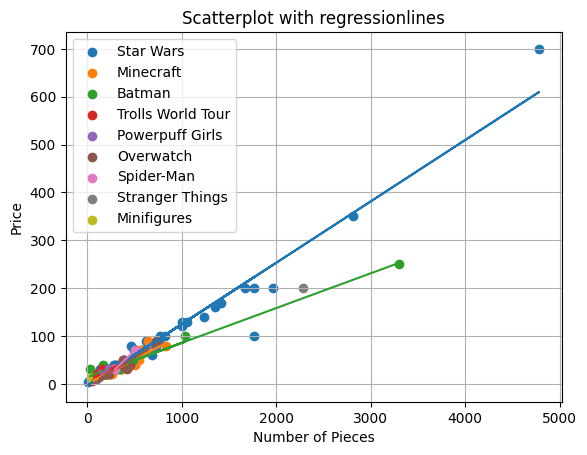

In [101]:
showMultipleRegressionLine(mythemes_all)
showMultipleRegressionLine(mythemes_brands)
showMultipleRegressionLine(mythemes_notBrands)
showMultipleRegressionLine(mythemes_unclearBrands)

## Evaluering av modeller

In [102]:
def showQQPlot(formel, dataframe):
    # Steg 5: Evaluere om modellen passer til dataene
    # med interaksjonsledd mellom antall brikker og tema

    modell3_mlri = smf.ols(formel, data = dataframe)
    modell3_mlri.fit().summary()

    # Plotte predikert verdi mot residual

    figure, axis = plt.subplots(1, 2, figsize = (15, 5))
    sns.scatterplot(x = modell3_mlri.fit().fittedvalues, y = modell3_mlri.fit().resid, ax = axis[0])
    axis[0].set_ylabel("Residual")
    axis[0].set_xlabel("Predicted value")

    # Lage kvantil-kvantil-plott for residualene
    sm.qqplot(modell3_mlri.fit().resid, line = '45', fit = True, ax = axis[1])
    axis[1].set_ylabel("Quantiles in residuals")
    axis[1].set_xlabel("Quantiles in normal-distribution")
    plt.show()

In [103]:
def MLR(formel, dataframe):
    modell = smf.ols(formel, data = dataframe)
    resultat = modell.fit()
    return resultat.summary()

In [104]:
# mlr_normal_formel = 'Price ~ Pieces + C(Category, Treatment("Non_Brand"))'
# Denne formelen er definert lengere opp i notebooken.
MLR(mlr_normal_formel, df2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     1277.
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          1.72e-285
Time:                        05:42:51   Log-Likelihood:                -3191.2
No. Observations:                 714   AIC:                             6390.
Df Residuals:                     710   BIC:                             6409.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         11.0394      1.318      8.378      0.000       8.452      13.626
C(Category, Treatment("Non_Brand"))[T.Brand]      -3.2262      1.785     -1.807      0.071      -6.731       0.279
C(Category, Treatment("Non_Brand"))[T.Unclear]     1.8033      2.132      0.846      0.398      -2.382       5.989
Pieces                                             0.0873      0.001     61.742      0.000       0.085       0.090
==============================================================================
Omnibus:                      653.532   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58679.662
Skew:                           3.672   Prob(JB):                         0.00
Kurtosis:                      46.801   Cond. No.                     2.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
# mlr_expanded_formel = 'Price ~ Pieces * C(Category, Treatment("Non_Brand"))'
# Denne formelen er definert lengere opp i notebooken.
MLR(mlr_expanded_formel, df2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     970.5
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          5.75e-314
Time:                        05:42:51   Log-Likelihood:                -3117.8
No. Observations:                 714   AIC:                             6248.
Df Residuals:                     708   BIC:                             6275.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                12.9719      1.353      9.585      0.000      10.315      15.629
C(Category, Treatment("Non_Brand"))[T.Brand]              0.2949      2.003      0.147      0.883      -3.637       4.227
C(Category, Treatment("Non_Brand"))[T.Unclear]          -12.9186      2.401     -5.381      0.000     -17.632      -8.205
Pieces                                                    0.0823      0.002     39.174      0.000       0.078       0.086
Pieces:C(Category, Treatment("Non_Brand"))[T.Brand]      -0.0079      0.003     -2.698      0.007      -0.014      -0.002
Pieces:C(Category, Treatment("Non_Brand"))[T.Unclear]     0.0328      0.003      9.871      0.000       0.026       0.039
==============================================================================
Omnibus:                      359.233   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8860.251
Skew:                           1.713   Prob(JB):                         0.00
Kurtosis:                      19.914   Cond. No.                     3.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

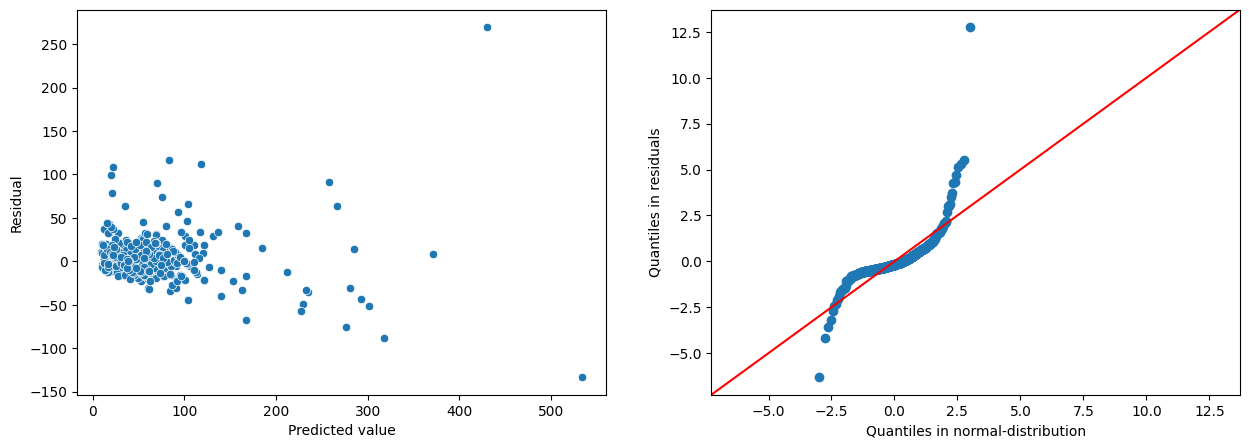

In [106]:
showQQPlot(mlr_normal_formel, df2)

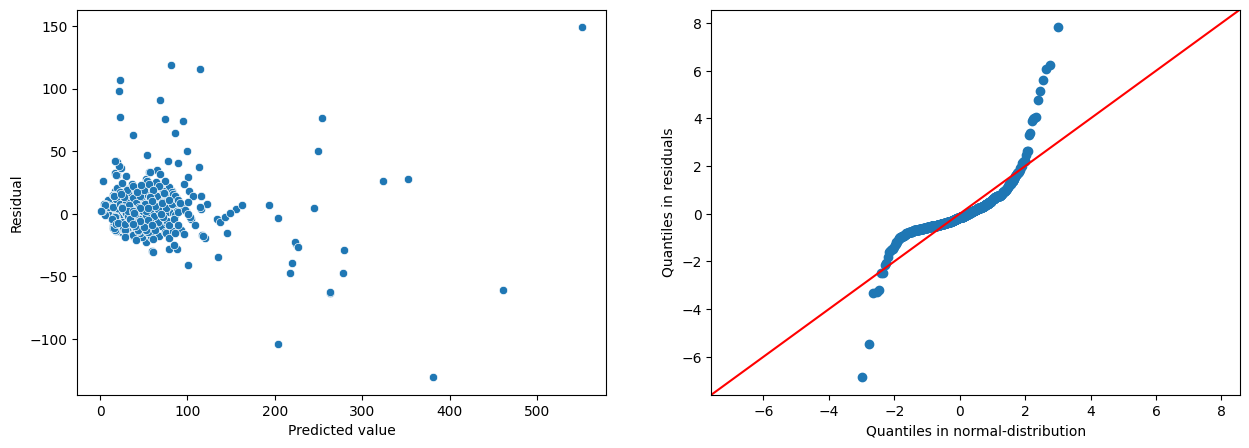

In [107]:
showQQPlot(mlr_expanded_formel, df2)

In [108]:
def estimatedValue(varemerke, pieces):
    selected_varemerke = 0
    selected_pieces = 0
    match (varemerke):
        case "Unclear":
            selected_varemerke = -12.9186
            selected_pieces = 0.0328
        case "Brand":
            selected_varemerke = 0.2949
            selected_pieces = -0.0079
        case _:
            selected_varemerke = 0
    return round(12.9719 + selected_varemerke + (0.0823 * pieces) + (selected_pieces * pieces), 2)

In [109]:
for i in range(990, 1010):
    if not (df2.loc[df2['Pieces'] == i]).empty:
        print(df2.loc[df2['Pieces'] == i], "\n")

                                       Set_Name             Theme  Price  \
690  Queen Watevra's So-Not-Evil' Space Palace  THE LEGO MOVIE 2  99.99   

     Pieces  Pages  Minifigures  Unique_Pieces Category  
690   997.0  212.0          5.0          275.0    Brand   

                  Set_Name    Theme  Price  Pieces  Pages  Minifigures  \
707  Summer Fun Water Park  Friends  99.99  1001.0  316.0          4.0   

     Unique_Pieces   Category  
707          394.0  Non_Brand   

                       Set_Name   Theme  Price  Pieces  Pages  Minifigures  \
790  Sanctum Sanctorum Showdown  Marvel  99.99  1004.0  220.0          5.0   

     Unique_Pieces Category  
790          312.0    Brand   

               Set_Name      Theme   Price  Pieces  Pages  Minifigures  \
745  Kylo Ren's Shuttle  Star Wars  129.99  1005.0  184.0          6.0   

     Unique_Pieces Category  
745          271.0  Unclear   

                               Set_Name      Theme   Price  Pieces  Pages  \
735  Sl

In [110]:
print("Marvel (Original price = 119.99 $): ", estimatedValue("Brand", 1363.0))
print("Hidden Side (Original price = 129.99 $): ", estimatedValue("Original", 1474.0))

Marvel (Original price = 119.99 $):  114.67
Hidden Side (Original price = 129.99 $):  134.28


In [111]:
print("Original price on sets below: 149.99 \n")

print("Capital City (City) estimated price = ", estimatedValue("Original", 1211.0))
print("Rocket Assembly & Transport (City) estimated price = ", estimatedValue("Original", 1055.0))
print("Ocean Exploration Ship (City) estimated price = ", estimatedValue("Original", 745.0))

print("The Rexcelsior! (TLM2) estimated price = ", estimatedValue("Brand", 1826.0))
print("Monkey Kong Warrior Mech (Monkie Kid) estimated price = ", estimatedValue("Brand", 975.0))

print()

print("Original price on sets below: 99.99 \n")

print("Yoda (Star Wars) estimated price = ", estimatedValue("Unclear", 1771.0))
print("Deep Space Rocket and Launch Control (City) estimated price = ", estimatedValue("Original", 837.0))
print("Avengers Compound Battle (Marvel) estimated price = ", estimatedValue("Brand", 699.0))

print()

print("Original price on sets below: 49.99 \n")

print("Junkrat & Roadhog (Overwatch) estimated price = ", estimatedValue("Unclear", 380.0))
print("Haunted Fairground (Hidden Side) estimated price = ", estimatedValue("Original", 466.0))
print("Buzz & Woody's Carnival Mania! (Disney) estimated price = ", estimatedValue("Brand", 230.0))

Original price on sets below: 149.99 

Capital City (City) estimated price =  112.64
Rocket Assembly & Transport (City) estimated price =  99.8
Ocean Exploration Ship (City) estimated price =  74.29
The Rexcelsior! (TLM2) estimated price =  149.12
Monkey Kong Warrior Mech (Monkie Kid) estimated price =  85.81

Original price on sets below: 99.99 

Yoda (Star Wars) estimated price =  203.9
Deep Space Rocket and Launch Control (City) estimated price =  81.86
Avengers Compound Battle (Marvel) estimated price =  65.27

Original price on sets below: 49.99 

Junkrat & Roadhog (Overwatch) estimated price =  43.79
Haunted Fairground (Hidden Side) estimated price =  51.32
Buzz & Woody's Carnival Mania! (Disney) estimated price =  30.38


# Hypotesetestinger

Dette tar utgangspunkt i MLR, hvor hver enkelt forklaringsvariabel, i tillegg til de kategoriske,
for å gi et helhetlig bilde på om de forskjellige variablene faktisk har en effekt på pris.

Her er det viktig å se at de variablene som ikke skal testes er likt for H0 og H1.

### Sjekker hypotesten for den kategoriske variablen varemerke

Her vil antall brikker være det samme for H0, H1 og H2

In [112]:
# H0: Varen er "Unclear":

H_0 = estimatedValue("Non_Brand", 1000)
print("Non_Brand: ", H_0)

# H1: Varen er "Original":

H_1 = estimatedValue("Brand", 1000)
print("Brand: ", H_1)

# H2: Varen er "Brand":

H_2 = estimatedValue("Unclear", 1000)
print("Unclear: ", H_2)


Non_Brand:  95.27
Brand:  87.67
Unclear:  115.15


### Hvordan tolke disse dataene

Her må vi se på P > |t| verdiene til de forskjellige hypotesene.

Non_Brand er lagt inn som referanse i intercept, og vil ha p-verdi < 0.0005. Dette er mindre enn signifikansnivået på 0.05, og vi kan derfor forkaste H_0.

Brand har p-verdi = 0.883 som er vesentlig større enn signifikansnivået på 0.05. Vi kan derfor IKKE forkaste H_1.

Unclear har p-verdi < 0.0005 som er mindre enn signifikansnivået på 0.05. Vi kan derfor forkaste H_2.

### Videre

Dataene våre sier derimot at prisen endrer seg gitt ulik kategori for varemerke. En vare innenfor "Unclear" koster mest, mens "Non_Brand" koster litt mindre, og "Brand" har den minste antatte prisen ut fra modellen.

Dette kan tydelig sees på modellen vist under:

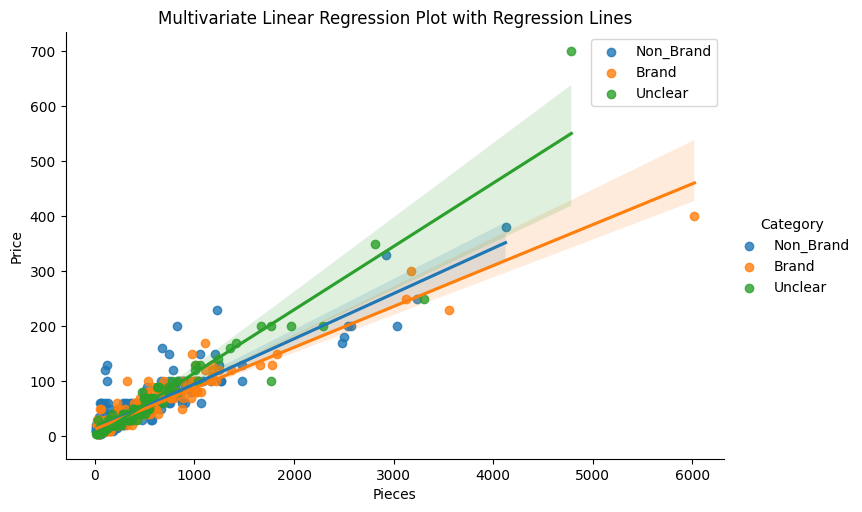

Intercept                                                12.971854
C(Category, Treatment("Non_Brand"))[T.Brand]              0.294870
C(Category, Treatment("Non_Brand"))[T.Unclear]          -12.918626
Pieces                                                    0.082297
Pieces:C(Category, Treatment("Non_Brand"))[T.Brand]      -0.007938
Pieces:C(Category, Treatment("Non_Brand"))[T.Unclear]     0.032831
dtype: float64


In [113]:
modell3_mlri = smf.ols(mlr_expanded_formel, data=df2)
results = modell3_mlri.fit()

# Create a scatter plot with regression lines
sns.lmplot(x='Pieces', y='Price', hue='Category', data=df2, aspect=1.5)

# Plot regression lines for each category
pieces_range = np.linspace(df2['Pieces'].min(),df2['Pieces'].max(), 100)
for varemerke in df2['Category'].unique():
    varemerke_values = np.zeros_like(pieces_range)
    varemerke_values[:] = results.params['Intercept']
    varemerke_values += results.params['Pieces'] * pieces_range
    if (df2['Category'] != 'Non_Brand').all():
        varemerke_values += results.params[f'Pieces:Category[T.{varemerke}]'] * pieces_range
        plt.plot(pieces_range, varemerke_values, label=f'Regression Line - {varemerke}', linestyle='dashed')

plt.title('Multivariate Linear Regression Plot with Regression Lines')
plt.legend()
plt.show()

# Extract coefficients
coefficients = results.params
print(coefficients)